In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, MaxPooling2D, Conv2D, Flatten, Reshape
from keras.optimizers import Adam
from keras import regularizers
from keras import optimizers
from keras import initializers
from keras.preprocessing import image

import keras.backend as K

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import matplotlib.patches as patches

Using TensorFlow backend.


In [2]:
# Read images
images = np.zeros((1334,260,400))

for i in range(480):
    filename = 'dataOpenedEye/openedEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i] = img

for i in range(81):
    filename = 'dataPavel/pavelEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+480] = img
    
for i in range(74):
    filename = 'dataYannick/yannickEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+561] = img

for i in range(75):
    filename = 'dataKevin/kevinEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+635] = img 

for i in range(216):
    filename = 'dataAli/aliEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+710] = img
    
for i in range(209):
    filename = 'dataMarie/marieEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+926] = img
    
for i in range(199):
    filename = 'dataHelene/heleneEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    images[i+1135] = img
       
    
images = np.reshape(images, (images.shape[0], images.shape[1], images.shape[2], 1))

# Rescale images
images = images/255.

images.shape

(1334, 260, 400, 1)

In [3]:
# Read target values
target1 = pd.read_csv('dataOpenedEye/dataPupilCenter.csv')
target2 = pd.read_csv('dataPavel/pavelPupilCenter.csv')
target3 = pd.read_csv('dataYannick/yannickPupilCenter.csv')
target4 = pd.read_csv('dataKevin/kevinPupilCenter.csv')
target5 = pd.read_csv('dataAli/aliPupilCenter.csv')
target6 = pd.read_csv('dataMarie/mariePupilCenter.csv')
target7 = pd.read_csv('dataHelene/helenePupilCenter.csv')
target = [target1, target2, target3, target4, target5, target6, target7]
target = pd.concat(target)

target.shape

(1334, 3)

In [4]:
# Remove missing values
images = images[target.xcentral != '?']
target = target[target.xcentral != '?']
target = target.astype('float32')
target.shape

(1280, 3)

In [5]:
# Put target data in shape
targetX = target['xcentral'].values.reshape((target['xcentral'].shape[0], 1))
targetY = target['ycentral'].values.reshape((target['ycentral'].shape[0], 1))

# Rescale targets between 0 and 1 
targetX = targetX/400.
targetY = targetY/260.

targetTrain = np.concatenate((targetX, targetY), axis=1)
targetTrain.shape

(1280, 2)

In [6]:
# Data augmentation by adding horizontal mirror images
imagesFlipped = np.flip(images, axis=2)

targetFlipped = np.zeros(targetTrain.shape)
targetFlipped[:,0] = 1-targetTrain[:,0]
targetFlipped[:,1] = targetTrain[:,1]

images = np.concatenate((images, imagesFlipped), axis=0)
targetTrain = np.concatenate((targetTrain, targetFlipped), axis=0)

<IPython.core.display.Javascript object>


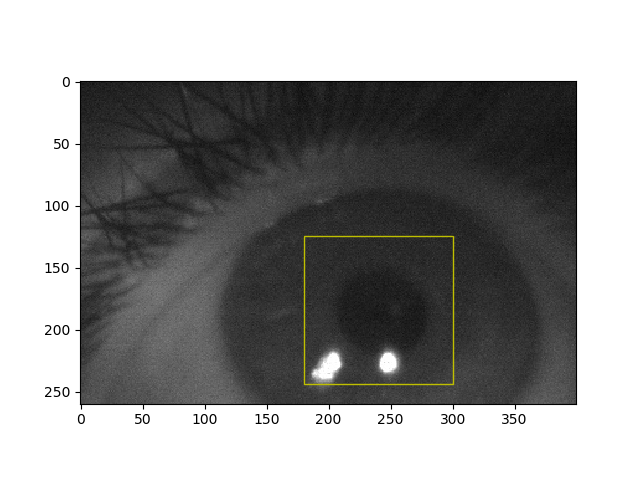

In [17]:
%matplotlib notebook
# Image to display
index=100

display = np.reshape(images[index], (260,400))
box = targetTrain[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [7]:
# Shuffle data
xtrain, ytrain = shuffle(images, targetTrain, random_state=0)
#xvalid = xtrain[512:]
#xtrain = xtrain[:512]
#yvalid = ytrain[512:]
#ytrain = ytrain[:512]

In [214]:
def model(Xshape):
    
    mod = Sequential()
    
    mod.add(Reshape((Xshape[0]*Xshape[1],), input_shape=(Xshape)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(64, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(32, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(16, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=regularizers.l2(0.00)))
    mod.add(Dense(2, activation='sigmoid', kernel_initializer='glorot_normal'))
    
    return mod

In [215]:
mymodel = model(xtrain.shape[1:])
opt = optimizers.Adam(lr=0.0001)
mymodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [216]:
# First train with small mini batch size and default learning rate
mymodel.fit(xtrain, ytrain, epochs = 50, batch_size=64)

Epoch 1/50
2560/2560 [==============================] - 7s 3ms/step - loss: 0.0293 - acc: 0.6746
Epoch 2/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0150 - acc: 0.8242
Epoch 3/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0134 - acc: 0.8309
Epoch 4/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0125 - acc: 0.8363
Epoch 5/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0113 - acc: 0.8426
Epoch 6/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0107 - acc: 0.8473
Epoch 7/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0103 - acc: 0.8602
Epoch 8/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0101 - acc: 0.8566
Epoch 9/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0085 - acc: 0.8645
Epoch 10/50
2560/2560 [==============================] - 6s 2ms/step - loss: 0.0071 - acc: 0.8742
Epoch 11/50
2560/2560 [======

In [217]:
# Then train with smaller learning rate and larger batch size
K.set_value(mymodel.optimizer.lr, 0.0005)
mymodel.fit(xtrain, ytrain, epochs = 5, batch_size=128)
K.set_value(mymodel.optimizer.lr, 0.0001)
mymodel.fit(xtrain, ytrain, epochs = 5, batch_size=256)

Epoch 1/5
2560/2560 [==============================] - 4s 2ms/step - loss: 9.5789e-04 - acc: 0.9598
Epoch 2/5
2560/2560 [==============================] - 4s 2ms/step - loss: 8.1037e-04 - acc: 0.9633
Epoch 3/5
2560/2560 [==============================] - 4s 2ms/step - loss: 7.8072e-04 - acc: 0.9648
Epoch 4/5
2560/2560 [==============================] - 4s 2ms/step - loss: 7.6962e-04 - acc: 0.9629
Epoch 5/5
2560/2560 [==============================] - 4s 2ms/step - loss: 7.4763e-04 - acc: 0.9641
Epoch 1/5
2560/2560 [==============================] - 3s 1ms/step - loss: 7.2284e-04 - acc: 0.9668
Epoch 2/5
2560/2560 [==============================] - 3s 1ms/step - loss: 7.0544e-04 - acc: 0.9645
Epoch 3/5
2560/2560 [==============================] - 3s 1ms/step - loss: 6.9976e-04 - acc: 0.9664
Epoch 4/5
2560/2560 [==============================] - 3s 1ms/step - loss: 7.0094e-04 - acc: 0.9660
Epoch 5/5
2560/2560 [==============================] - 3s 1ms/step - loss: 6.9972e-04 - acc: 0.9664


In [218]:
# Make the prediction on all
ypredict = mymodel.predict(images)

X mean and stdev of diff:  -0.001514475564181339 0.025918171815100505
Y mean and stdev of diff:  0.0037685168790630996 0.025918171815100505


<IPython.core.display.Javascript object>


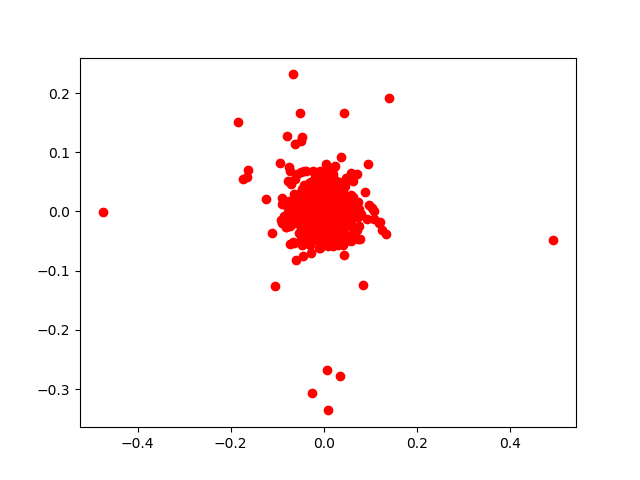

In [219]:
# Plot the diff between prediction and target values
diff = ypredict-targetTrain

print('X mean and stdev of diff: ', np.mean(diff[:,0]), np.std(diff[:,1]))
print('Y mean and stdev of diff: ', np.mean(diff[:,1]), np.std(diff[:,1]))

%matplotlib notebook
plt.plot(diff[:,0], diff[:,1],'ro')
plt.show()

<IPython.core.display.Javascript object>


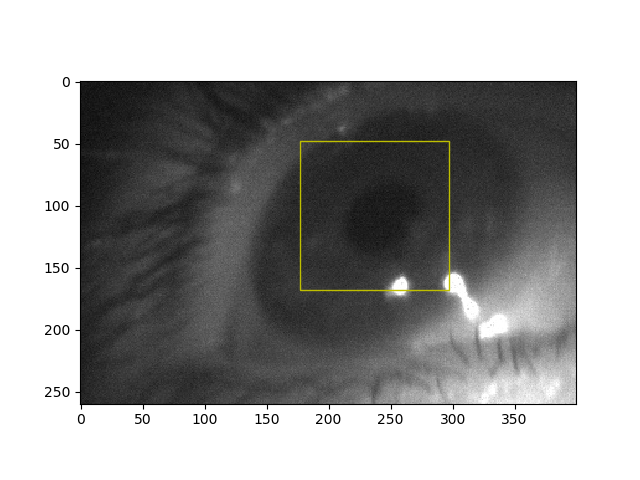

In [227]:
#%matplotlib notebook
index=6

display = np.reshape(images[index], (260,400))
box = ypredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [201]:
# Make the prediction on a totally new dataset
# Read images
newImages = np.zeros((209,260,400))

for i in range(209):
    filename = 'dataJade/jadeEye'+str(i)+'.jpg'
    img=mpimg.imread(filename)
    newImages[i] = img

        
newImages = np.reshape(newImages, (newImages.shape[0], newImages.shape[1], newImages.shape[2], 1))

# Rescale images
newImages = newImages/255.

# Make the prediction for valid dataset
newImagesPredict = mymodel.predict(newImages)

<IPython.core.display.Javascript object>


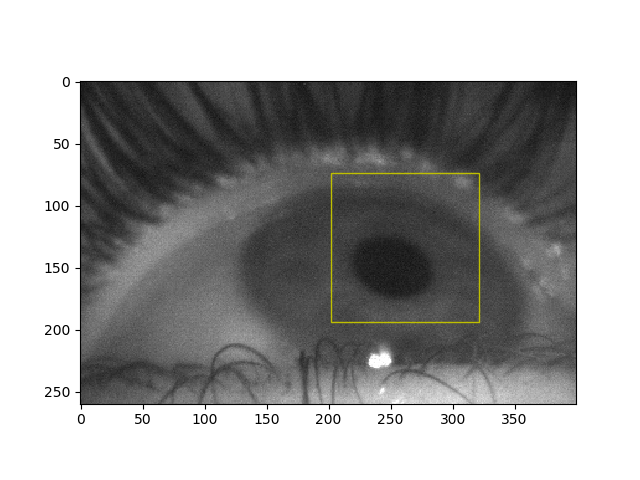

In [205]:
# Image to display
index=120

display = np.reshape(newImages[index], (260,400))
box = newImagesPredict[index]

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(display, cmap='gray')

# Create a Rectangle patch
rect = patches.Rectangle((box[0]*400-60,box[1]*260-60),120,120,linewidth=1,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()